In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

In [2]:
def random_matrix(shape):
    A = np.random.rand(shape[0], shape[1])*50
    return A

def random_integer_matrix(shape):
    return np.floor(random_matrix(shape))

(350, 350)
125.016227649 120.910921562


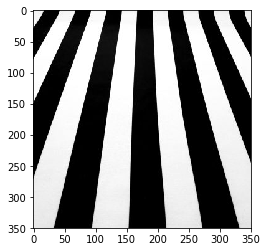

In [3]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

X = random_integer_matrix((5,15))

im = Image.open("image/image5.jpg")
data_orig = rgb2gray(np.array(im))
print(data_orig.shape)
print(np.mean(data_orig), np.std(data_orig))
plt.imshow(data_orig, cmap='gray')
plt.show()

In [4]:
# Hyperparamters
X = data_orig

W = X.shape[0]
K = X.shape[1]
shape = (W, K)
I = 200
T_shape = (W, I)
V_shape = (I, K)

In [5]:
# SADA Sampler
print(np.mean(X), np.std(X))

# Initialization

# mean = gamma_scale * gamma_shape
# variance = gamma_scale * gamma_shape^2

data_variance = (np.std(X)/(I/5))**2
data_mean = np.mean(X)/I*1.3
print(data_mean, data_variance)

gamma_scale = data_variance/data_mean # b/sqrt(a) == std
gamma_shape = data_mean/gamma_scale
print(gamma_scale, gamma_shape)

A_t = np.ones(T_shape)*gamma_shape
B_t = np.ones(T_shape)*gamma_scale
A_v = np.ones(V_shape)*gamma_shape
B_v = np.ones(V_shape)*gamma_scale

T = np.random.gamma(A_t,B_t)
V = np.random.gamma(A_v,B_v)
print(np.mean(np.dot(T,V)), np.std(np.dot(T,V)))

mean_diff = np.mean(np.abs(X - np.dot(T,V)))
print("Random loss: ", mean_diff)

125.016227649 120.910921562
0.812605479718 9.13715684554
11.2442717574 0.0722683956105
133.146150405 136.470156849
Random loss:  142.299249276


In [6]:
# Loop
max_iter = 100
for n in range(max_iter):
    
    p = np.zeros((W, I ,K))
    S = np.zeros((W, I ,K))
    
    for v in range(W):
        for t in range(K):
            p[v, :, t] = ((T[[v],:]*V[:, [t]].T)/ T[[v],:].dot(V[:, [t]]))
            S[v, :, t] = np.random.binomial(X[v,t], p[v, :, t].squeeze())
    
    alpha_t = A_t + np.sum(S, axis=2)
    beta_t = 1./(A_t/B_t + np.ones((W,1)).dot(V.dot(np.ones((K,1))).T))
    #A_t = A_t + np.sum(S, axis=2)
    #B_t = B_t + np.ones((W,1)).dot(V.dot(np.ones((K,1))).T)
    
    alpha_v = A_v + np.sum(S, axis=0)
    beta_v = 1./(A_v/B_v + np.dot(np.ones((W,1)).T.dot(T).T, np.ones((K,1)).T))
    #A_v = A_v + np.sum(S, axis=0)
    #B_v = B_v + np.dot(np.ones((W,1)).T.dot(T).T, np.ones((K,1)).T)

    T = np.random.gamma(alpha_t, beta_t)
    V = np.random.gamma(alpha_v, beta_v)
    #T = np.random.gamma(A_t, B_t)
    #V = np.random.gamma(A_v, B_v)
    
    if n % 1 == 0:
        mean_diff = np.mean(np.abs(X - np.dot(T,V)))
        print("epoch %d: loss: "%n, mean_diff)

epoch 0: loss:  101.244983543
epoch 1: loss:  96.1071569534
epoch 2: loss:  90.8086818111
epoch 3: loss:  85.4627240939
epoch 4: loss:  79.4527652264
epoch 5: loss:  72.4244215332
epoch 6: loss:  66.2359670691
epoch 7: loss:  60.8866471111
epoch 8: loss:  55.9096836429
epoch 9: loss:  52.924138867
epoch 10: loss:  48.9898015783
epoch 11: loss:  47.5851632015
epoch 12: loss:  44.2312182739
epoch 13: loss:  43.693854776
epoch 14: loss:  40.7181972455
epoch 15: loss:  40.7265381809
epoch 16: loss:  37.9967617446
epoch 17: loss:  38.2847454675
epoch 18: loss:  35.7286501218
epoch 19: loss:  36.2569793142
epoch 20: loss:  33.8279924612
epoch 21: loss:  34.462419375
epoch 22: loss:  32.1585221996
epoch 23: loss:  32.8976227317
epoch 24: loss:  30.7030848657
epoch 25: loss:  31.511186326
epoch 26: loss:  29.4180140803
epoch 27: loss:  30.2705794871
epoch 28: loss:  28.291867969
epoch 29: loss:  29.2003727734
epoch 30: loss:  27.256205123
epoch 31: loss:  28.226302747
epoch 32: loss:  26.33981

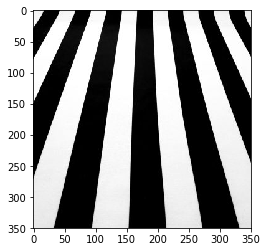

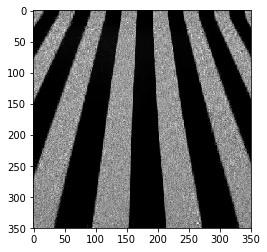

In [7]:
# print(X)
# print(np.dot(T,V))

plt.imshow(X, cmap='gray')
plt.show()
plt.imshow(np.dot(T,V), cmap='gray')
plt.show()

In [8]:
print(np.mean(X), np.std(X))
print(np.mean(np.dot(T,V)), np.std(np.dot(T,V)))

125.016227649 120.910921562
130.721596972 127.786046898
